In [2]:
import json
import matplotlib.pyplot as plt

In [3]:
def get_data_from_stats_json (filename):
    """
        Takes a .json file, gets from the json-objects in it certain interesting values 
        and processes them for further analysis. 
    """
    with open (filename, 'r') as file:
        data = json.load(file)

    container_output = data.get("containerOutput")
    tcp_percentage = data.get("tcpPercentage")
    cpu_nano = [out.get("Stats")[0].get("CPUNano") for out in container_output]
    cpu_system_nano = [out.get("Stats")[0].get("CPUSystemNano") for out in container_output]
    cpu_nano_diffs = [cpu_nano[i] - cpu_nano[i-1] for i in range(1, len(cpu_nano))]
    cpu_system_nano_diffs = [cpu_system_nano[i] - cpu_system_nano[i-1] for i in range(1, len(cpu_system_nano))]
    initial_time = 0
    timing = [initial_time + i * 30 for i in range(len(cpu_nano_diffs))]
    sending_time = data.get("querySendingTime")
    number_queries = data.get("numberOfQueries" )
    network = data.get("network")

    return {
        "container_output" : container_output, 
        "tcp_percentage" : tcp_percentage, 
        "sending_time" : sending_time, 
        "number_queries" : number_queries, 
        "network" : network, 
        "cpu_nano_diffs" : cpu_nano_diffs, 
        "cpu_system_nano_diffs": cpu_system_nano_diffs, 
        "timing" : timing
    }



In [4]:
def make_a_plot(lines, x_axis_label, y_axis_label, title):
    """
        Takes lines and plots them with on the x-axis and y-axis the given label
        and having the given title.
    """
    for (x_data, y_data, data_label) in lines:
        if data_label is not None:
            plt.plot(x_data, y_data, label=data_label)
        else:
            plt.plot(x_data, y_data)
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
    plt.title(title)
    plt.legend(loc='upper right')
    plt.show()

# Host vs Pasta network
Some plots that allow us to compare using the host network mode in podman with using the pasta network mode. 

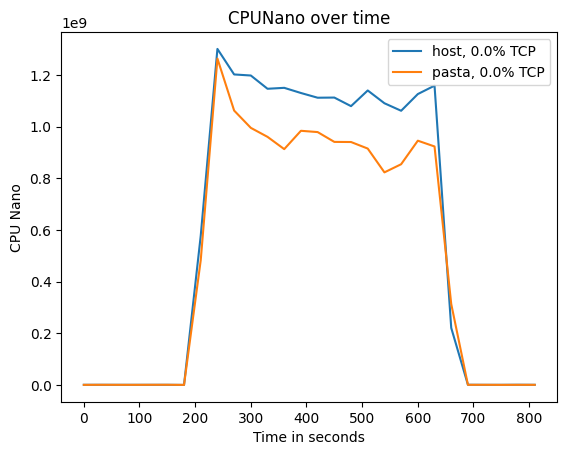

In [5]:
pasta_udp = get_data_from_stats_json('stats-output/host_vs_pasta/0_tcp_pasta_22-10-2025_15:33:28.json')
host_udp = get_data_from_stats_json('stats-output/host_vs_pasta/0_tcp_host_22-10-2025_15:33:28.json')
make_a_plot([(host_udp["timing"], host_udp["cpu_nano_diffs"], f"host, {host_udp["tcp_percentage"]}% TCP"), (pasta_udp["timing"], pasta_udp["cpu_nano_diffs"], f"pasta, {pasta_udp["tcp_percentage"]}% TCP")], "Time in seconds", "CPU Nano", "CPUNano over time")

Testing whether using the host network impacts the measurements:


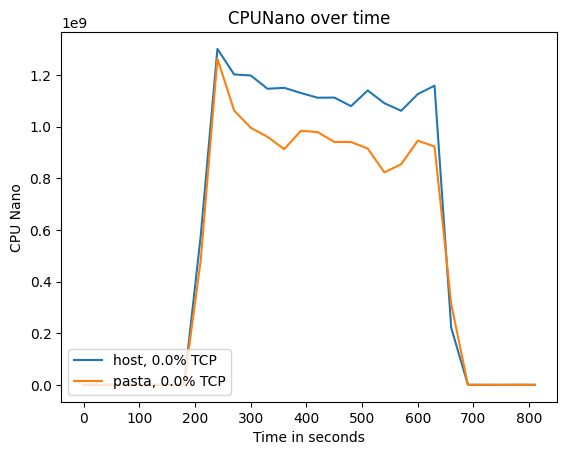

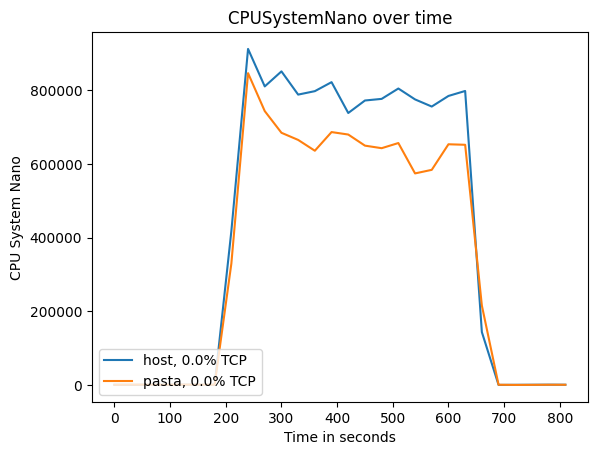

In [6]:
print("Testing whether using the host network impacts the measurements:")



plt.plot(host_udp["timing"], host_udp["cpu_nano_diffs"], label=f"host, {host_udp["tcp_percentage"]}% TCP")
plt.plot(pasta_udp["timing"], pasta_udp["cpu_nano_diffs"], label=f"pasta, {pasta_udp["tcp_percentage"]}% TCP")
plt.xlabel("Time in seconds")
plt.ylabel("CPU Nano")
plt.title("CPUNano over time")
plt.legend(loc='lower left')
plt.show()

plt.plot(host_udp["timing"], host_udp["cpu_system_nano_diffs"], label=f"host, {host_udp["tcp_percentage"]}% TCP")
plt.plot(pasta_udp["timing"], pasta_udp["cpu_system_nano_diffs"], label=f"pasta, {pasta_udp["tcp_percentage"]}% TCP")
plt.xlabel("Time in seconds")
plt.ylabel("CPU System Nano")
plt.title("CPUSystemNano over time")
plt.legend(loc='lower left')
plt.show()

Comparing the CPU usage for TCP vs UDP, with pasta and host network


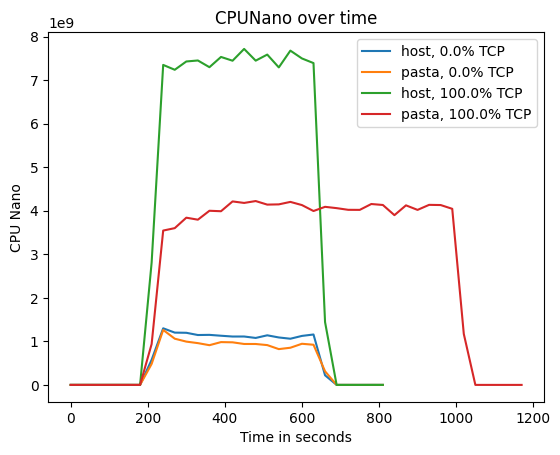

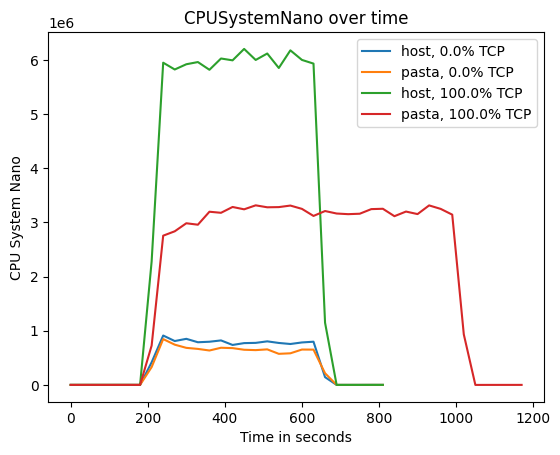

In [7]:
print("Comparing the CPU usage for TCP vs UDP, with pasta and host network")

pasta_udp = get_data_from_stats_json('stats-output/host_vs_pasta/0_tcp_pasta_22-10-2025_15:33:28.json')
host_udp = get_data_from_stats_json('stats-output/host_vs_pasta/0_tcp_host_22-10-2025_15:33:28.json')
pasta_tcp = get_data_from_stats_json('stats-output/host_vs_pasta/100_tcp_pasta_22-10-2025_15:33:28.json')
host_tcp = get_data_from_stats_json('stats-output/host_vs_pasta/100_tcp_host_22-10-2025_15:33:28.json')

plt.plot(host_udp["timing"], host_udp["cpu_nano_diffs"], label=f"host, {host_udp["tcp_percentage"]}% TCP")
plt.plot(pasta_udp["timing"], pasta_udp["cpu_nano_diffs"], label=f"pasta, {pasta_udp["tcp_percentage"]}% TCP")
plt.plot(host_tcp["timing"], host_tcp["cpu_nano_diffs"], label=f"host, {host_tcp["tcp_percentage"]}% TCP")
plt.plot(pasta_tcp["timing"], pasta_tcp["cpu_nano_diffs"], label=f"pasta, {pasta_tcp["tcp_percentage"]}% TCP")
plt.xlabel("Time in seconds")
plt.ylabel("CPU Nano")
plt.title("CPUNano over time")
plt.legend(loc='upper right')
plt.show()

plt.plot(host_udp["timing"], host_udp["cpu_system_nano_diffs"], label=f"host, {host_udp["tcp_percentage"]}% TCP")
plt.plot(pasta_udp["timing"], pasta_udp["cpu_system_nano_diffs"], label=f"pasta, {pasta_udp["tcp_percentage"]}% TCP")
plt.plot(host_tcp["timing"], host_tcp["cpu_system_nano_diffs"], label=f"host, {host_tcp["tcp_percentage"]}% TCP")
plt.plot(pasta_tcp["timing"], pasta_tcp["cpu_system_nano_diffs"], label=f"pasta, {pasta_tcp["tcp_percentage"]}% TCP")
plt.xlabel("Time in seconds")
plt.ylabel("CPU System Nano")
plt.title("CPUSystemNano over time")
plt.legend(loc='upper right')
plt.show()

# Different percentages of TCP

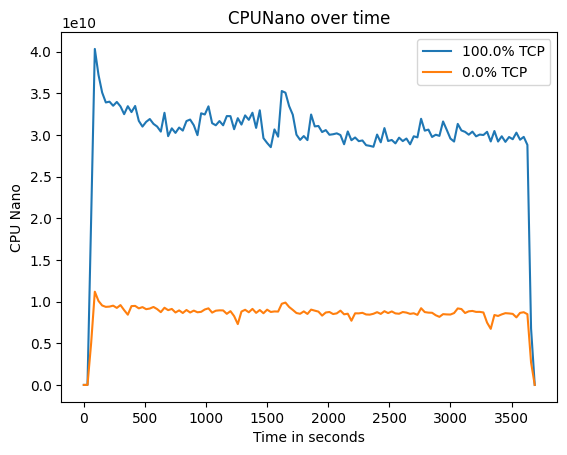

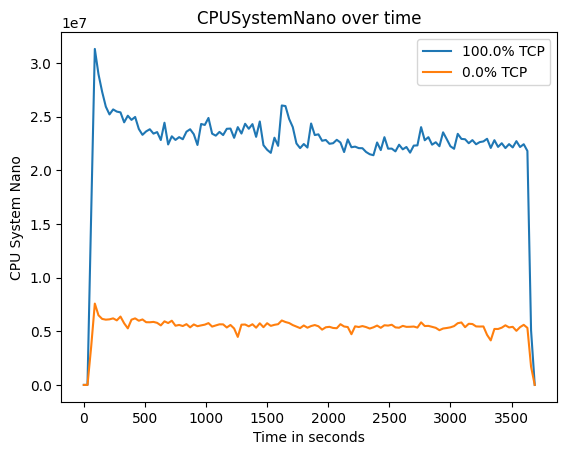

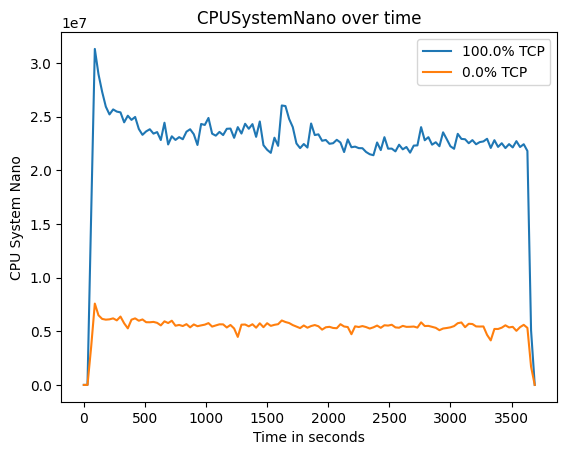

In [8]:
tcp_100 = get_data_from_stats_json('stats-output/100_tcp_host_10-11-2025_17:40:07_1.json')
tcp_0 = get_data_from_stats_json('stats-output/testing_combining/0_tcp_host_10-11-2025_14:42:38_1.json')

plt.plot(tcp_100["timing"], tcp_100["cpu_nano_diffs"], label=f"{tcp_100["tcp_percentage"]}% TCP")
plt.plot(tcp_0["timing"], tcp_0["cpu_nano_diffs"], label=f"{tcp_0["tcp_percentage"]}% TCP")
plt.xlabel("Time in seconds")
plt.ylabel("CPU Nano")
plt.title("CPUNano over time")
plt.legend(loc='upper right')
plt.show()

plt.plot(tcp_100["timing"], tcp_100["cpu_system_nano_diffs"], label=f"{tcp_100["tcp_percentage"]}% TCP")
plt.plot(tcp_0["timing"], tcp_0["cpu_system_nano_diffs"], label=f"{tcp_0["tcp_percentage"]}% TCP")
plt.xlabel("Time in seconds")
plt.ylabel("CPU System Nano")
plt.title("CPUSystemNano over time")
plt.legend(loc='upper right')
plt.show()

plt.plot(tcp_100["timing"], tcp_100["cpu_system_nano_diffs"], label=f"{tcp_100["tcp_percentage"]}% TCP")
plt.plot(tcp_0["timing"], tcp_0["cpu_system_nano_diffs"], label=f"{tcp_0["tcp_percentage"]}% TCP")
plt.xlabel("Time in seconds")
plt.ylabel("CPU System Nano")
plt.title("CPUSystemNano over time")
plt.legend(loc='upper right')
plt.show()

# Automated analysis results
*Focusing on the CPU usage*

In [9]:
import os
os.listdir("./stats-output")

['0_tcp_host_11-11-2025_16:53:11_9.json',
 'host_vs_pasta',
 '10_tcp_host_11-11-2025_16:53:11_4.json',
 '0_tcp_host_11-11-2025_16:53:11_7.json',
 'measurement_data',
 '0_tcp_host_11-11-2025_11:07:47_4.json',
 '0_tcp_host_11-11-2025_16:53:11_8.json',
 '0_tcp_host_11-11-2025_16:53:11_10.json',
 '10_tcp_host_11-11-2025_16:53:11_7.json',
 '100_tcp_host_10-11-2025_17:40:07_1.json',
 '20_tcp_host_11-11-2025_16:53:11_2.json',
 '20_tcp_host_11-11-2025_16:53:11_3.json',
 '10_tcp_host_11-11-2025_16:53:11_9.json',
 '20_tcp_host_11-11-2025_16:53:11_4.json',
 '100_tcp_host_10-11-2025_17:40:07_2.json',
 '10_tcp_host_11-11-2025_16:53:11_1.json',
 '0_tcp_host_11-11-2025_11:07:47_5.json',
 '0_tcp_host_11-11-2025_11:07:47_2.json',
 '10_tcp_host_11-11-2025_16:53:11_3.json',
 '0_tcp_host_11-11-2025_11:07:47_3.json',
 '10_tcp_host_11-11-2025_16:53:11_8.json',
 '10_tcp_host_11-11-2025_16:53:11_10.json',
 '0_tcp_host_11-11-2025_16:53:11_6.json',
 '20_tcp_host_11-11-2025_16:53:11_1.json',
 '0_tcp_host_11-11-2

In [10]:
def make_list_of_outputs(directory):
    """
        Take all files that are in directory `directory`, parse 
        the json stored in each file and add then to the right 
        dictionary list, corresponding to the TCP percentage
    """
    files = os.listdir(directory)
    parsed_0 = []
    parsed_10 = []
    # parsed_20 = []
    parsed_100 = []
    for filename in files:
        if not filename.endswith(".json"): # skip the files that are not json
            continue
        if filename.startswith("20"): # for now skip unfinished json file
            continue
        parsed_output =  get_data_from_stats_json(directory + '/' + filename)
        percentage = filename.split('_')[0]
        parsed_output['tcp_percentage'] = percentage
        if percentage == '0':
            parsed_0.append(parsed_output)
        # TODO: UNCOMMENT THE REST WHEN NECESSARY
        elif percentage == '10': 
            parsed_10.append(parsed_output)
        # elif percentage == '20': 
            # parsed_20.append(parsed_output)
        # elif percentage == '30': 
            # parsed_30.append(parsed_output)
        # elif percentage == '40': 
            # parsed_40.append(parsed_output)
        # elif percentage == '50': 
            # parsed_50.append(parsed_output)
        # elif percentage == '60': 
            # parsed_60.append(parsed_output)
        # elif percentage == '70': 
            # parsed_70.append(parsed_output)
        # elif percentage == '80': 
            # parsed_80.append(parsed_output)s
        # elif percentage == '90': 
            # parsed_90.append(parsed_output)
        elif percentage == '100':
            parsed_100.append(parsed_output)
    return parsed_0, parsed_10, parsed_100

In [11]:
# Getting the average for a given output list
def average_parsed_output(output_list):
    """
        Given output_list (a list of dictionaries containing the json output file) we compute 
        the average over the different lists of the 'cpu_nano_diffs' and the 'cpu_system_nano_diffs'
        entries and return these
    """
    cpu_duration_to_average = [d['cpu_nano_diffs'] for d in output_list]
    if not all(len(cpu_duration_list) == len(cpu_duration_to_average[0]) for cpu_duration_list in cpu_duration_to_average):
        print("Not all of the lists in the cpu_duration_to_average list of lists are the same length.")
        print("TODO: this needs to be fixed")
        return None
    avg_cpu_duration = [sum(values)/len(values) for values in zip(*cpu_duration_to_average)]
    
    sys_cpu_duration_to_average = [d['cpu_system_nano_diffs'] for d in output_list]
    if not all(len(sys_cpu_duration_list) == len(sys_cpu_duration_to_average[0]) for sys_cpu_duration_list in sys_cpu_duration_to_average):
        print("Not all of the lists in the cpu_duration_to_average list of lists are the same length.")
        print("TODO: this needs to be fixed")
        return None
    
    avg_sys_cpu_duration = [sum(values)/len(values) for values in zip(*sys_cpu_duration_to_average)]
    return avg_cpu_duration, avg_sys_cpu_duration

In [12]:
# ONLY FOR VERBOSE PLOTTING WITH ALL LINES PLOTTED 
def add_parsed_to_plotter(parsed, plotter_cpu, plotter_sys_cpu):
    """ 
        Takes the parsed dictionary and a list of plotting tuples and adds 
        the right information to the lists such that we can plot 
        the values in the dictionary
    """
    avg_cpu, avg_sys_cpu = average_parsed_output(parsed)
    for i, output in enumerate(parsed):
        plotter_cpu.append((output['timing'], output['cpu_nano_diffs'], None))
        plotter_sys_cpu.append((output['timing'], output['cpu_system_nano_diffs'], None))
    plotter_cpu.append((parsed[0]['timing'], avg_cpu, f"Avg for TCP {parsed[0]['tcp_percentage']}%"))
    plotter_sys_cpu.append((parsed[0]['timing'], avg_sys_cpu, f"Avg sys for TCP {parsed[0]['tcp_percentage']}%"))

In [13]:
# FOR ONLY PLOTTING THE AVERAGE 
def add_avg_parsed_to_plotter(parsed, plotter_cpu, plotter_sys_cpu):
    """
        Puts the average CPU usages from parsed on normal and on system level 
        into the right plotter arrays so that these can be plotted
    """
    avg_cpu, avg_sys_cpu = average_parsed_output(parsed)
    plotter_cpu.append((parsed[0]['timing'], avg_cpu, f"Avg for TCP {parsed[0]['tcp_percentage']}%"))
    plotter_sys_cpu.append((parsed[0]['timing'], avg_sys_cpu, f"Avg sys for TCP {parsed[0]['tcp_percentage']}%"))


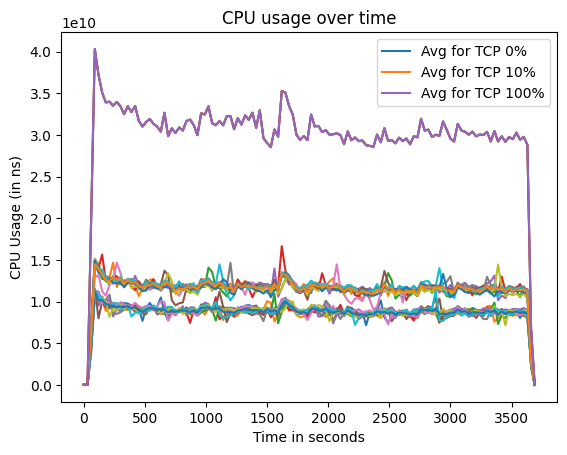

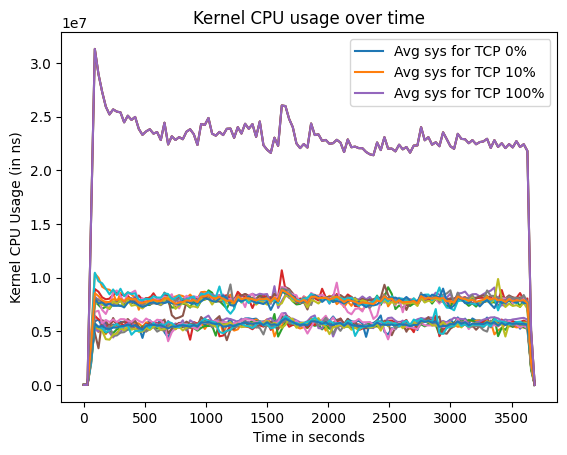

In [ ]:
parsed_outputs = make_list_of_outputs("stats-output/")

to_plot_cpu = []
to_plot_sys_cpu = []
for output in parsed_outputs:
    add_parsed_to_plotter(output, to_plot_cpu, to_plot_sys_cpu)


make_a_plot(to_plot_cpu, "Time in seconds", "CPU Usage (in ns)", "CPU usage over time")
make_a_plot(to_plot_sys_cpu, "Time in seconds", "Kernel CPU Usage (in ns)", "Kernel CPU usage over time")


# Plot only the average over time
This plot excludes the moments where the nameserver is not being queried

In [ ]:
def calc_avg_over_time(parsed, avgs_cpu, avgs_sys_cpu):
    """
        Calculates the average parsed output from parsed, then calculates 
        over this the average energy consumption within the relevant time interval,
        adds this average value to the avg_cpu list
    """
    avg_cpu, avg_sys_cpu = average_parsed_output(parsed)
    avg_over_time = sum(avg_cpu[2:-2])/len(avg_cpu[2:-2])
    avg_sys_over_time = sum(avg_sys_cpu[2:-2])/len(avg_sys_cpu[2:-2])
    avgs_cpu.append(avg_over_time)
    avgs_sys_cpu.append(avg_sys_over_time)


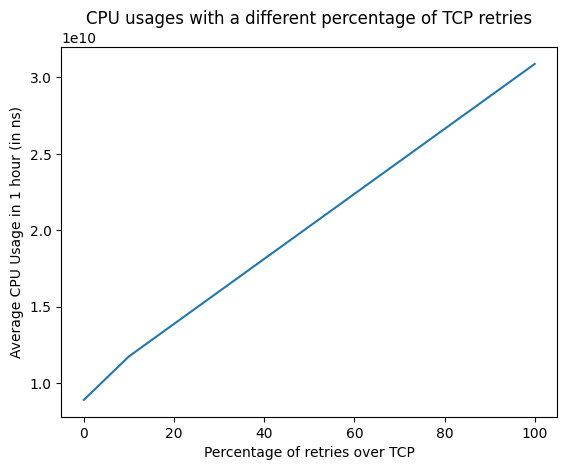

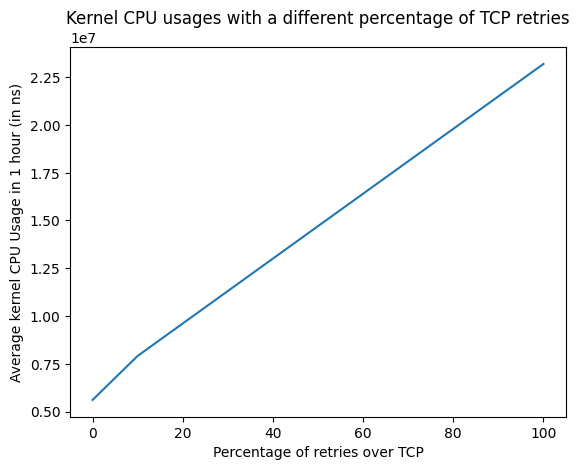

In [ ]:
avgs_over_time = []
avgs_sys_over_time = []
percentages = [0, 10, 100]
for output in parsed_outputs:
    calc_avg_over_time(output, avgs_over_time, avgs_sys_over_time)

plt.plot(percentages, avgs_over_time)
plt.xlabel("Percentage of retries over TCP")
plt.ylabel("Average CPU Usage in 1 hour (in ns)")
plt.title("CPU usages with a different percentage of TCP retries")
plt.show()

plt.plot(percentages, avgs_sys_over_time)
plt.xlabel("Percentage of retries over TCP")
plt.ylabel("Average kernel CPU Usage in 1 hour (in ns)")
plt.title("Kernel CPU usages with a different percentage of TCP retries")
plt.show()

# Checking to see if there is any measurement that is significantly different

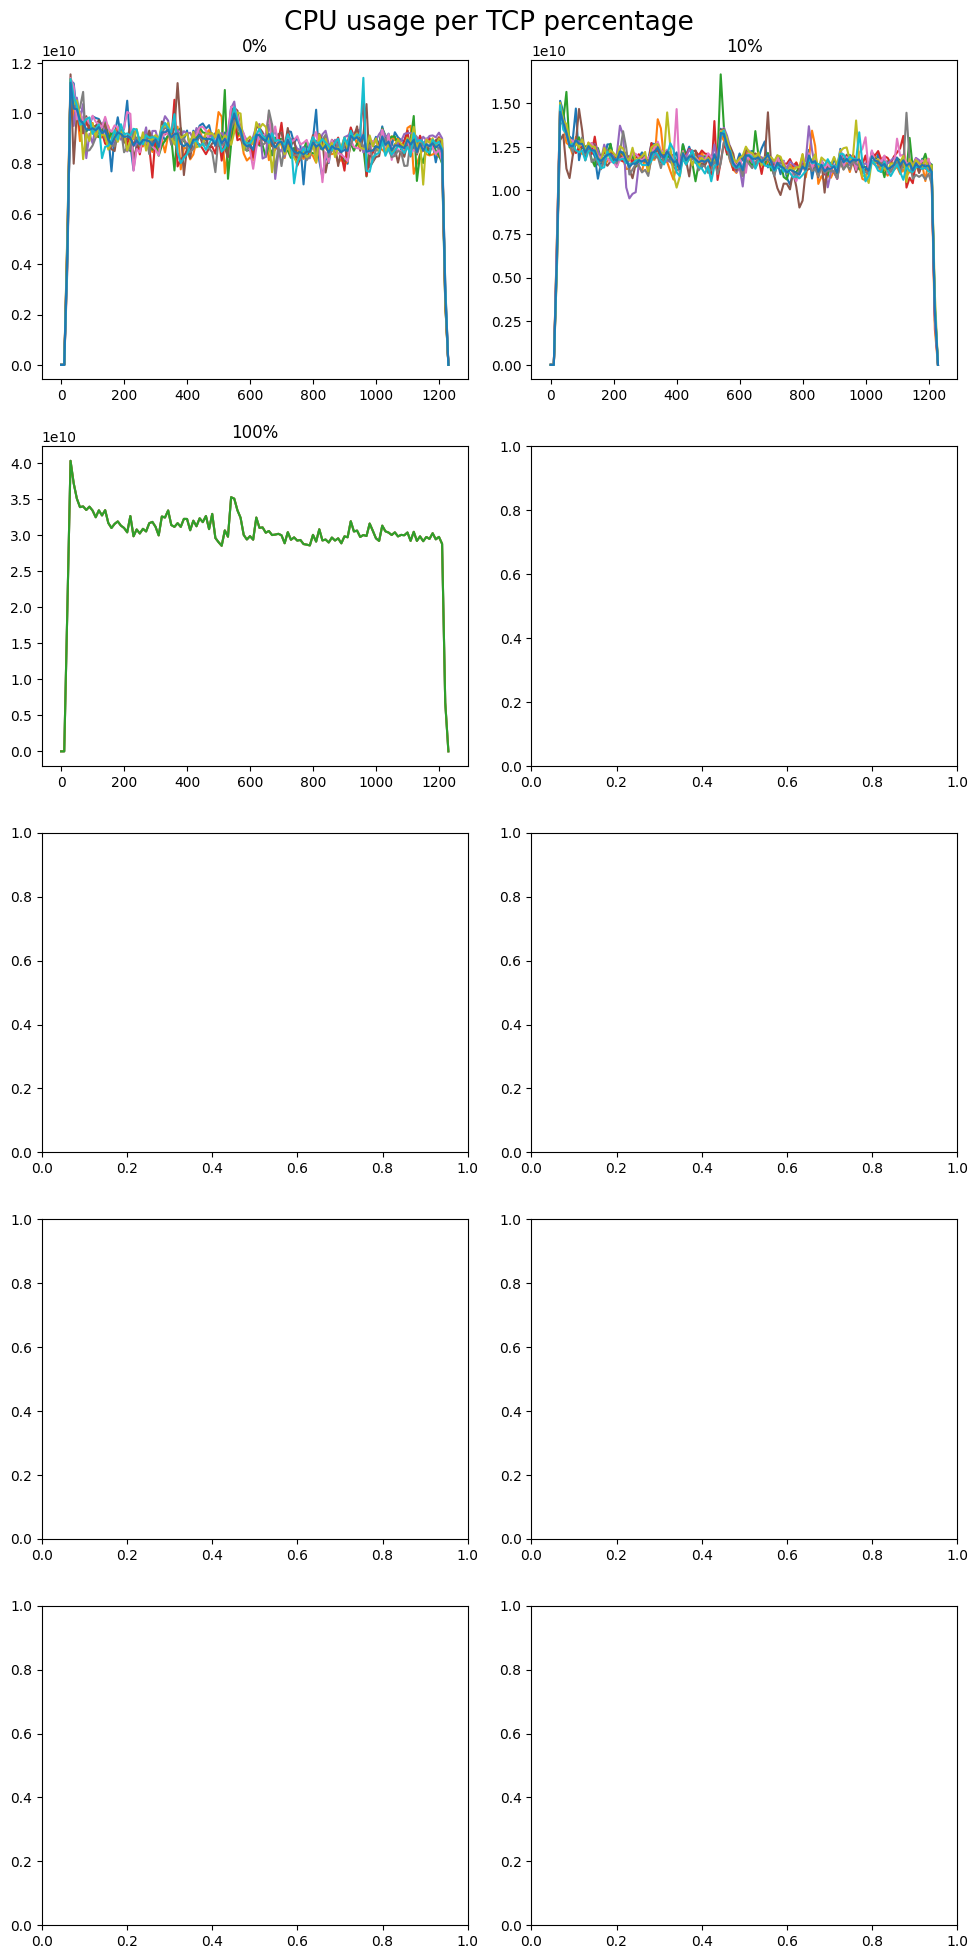

In [70]:
fig, axs = plt.subplots(5, 2, figsize=(10, 20))  
axs = axs.flatten()

i = 0
for line in to_plot_cpu:
    if line[2] is not None:
        axs[i].set_title(line[2].removeprefix("Avg for TCP "))
        axs[i].plot(line[0], line[1])
        i += 1
    else:
        axs[i].plot(line[0], line[1])
fig.suptitle('CPU usage per TCP percentage', fontsize=19)
plt.tight_layout(pad=1.5)
plt.show()  